In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data/Final/hotel_bookings.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.head(11)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [6]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
df.shape

(119390, 32)

## Things that related to cancellation ##

###Berapa banyak booking yang dibatalkan###

In [8]:
def get_count(series, limit=None):
  
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

In [9]:
x,y = get_count(df['is_canceled'])

In [10]:
x,y

(array([0, 1]), array([62.95837172, 37.04162828]))

In [12]:
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar'):
    
    sns.set_style('darkgrid')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax, sort=False)
        
    
    plt.show()

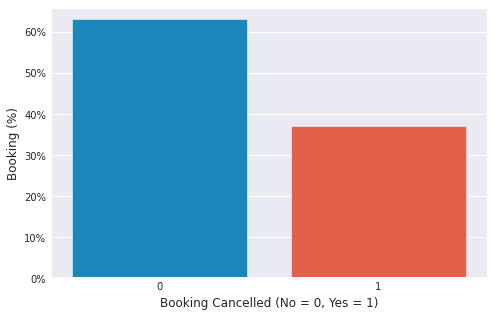

In [13]:
plot(x,y, x_label='Booking Cancelled (No = 0, Yes = 1)', y_label='Booking (%)')

### Jumlah kasus cancel berdasarkan tipe deposit ###

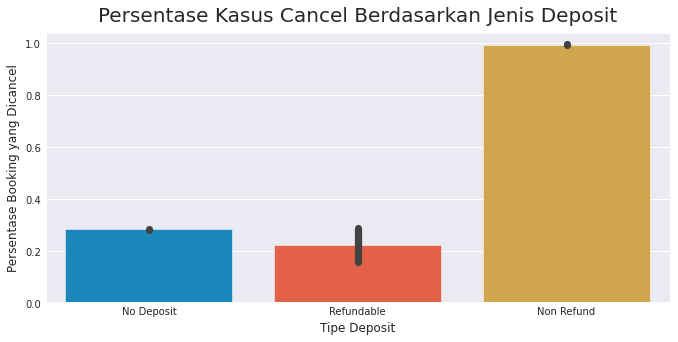

In [14]:
plt.figure(figsize=(10,5)) 
plt.title("Persentase Kasus Cancel Berdasarkan Jenis Deposit", fontsize = 20, pad = 10)
sns.barplot(x=df['deposit_type'], y=df['is_canceled'])
plt.xlabel("Tipe Deposit", fontsize = 12, labelpad = 5)
plt.ylabel("Persentase Booking yang Dicancel", fontsize = 12, labelpad = 5);

## Things that related to booking status ##

### Ratio Booking per Jenis Hotel ###

In [15]:
df_not_canceled = df[df['is_canceled'] == 0]

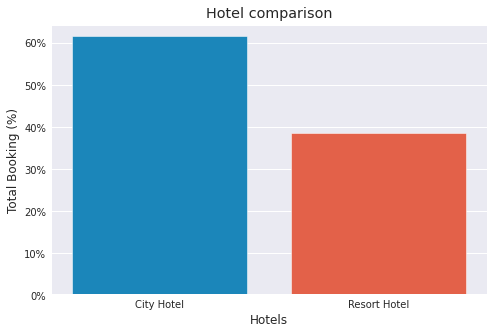

In [16]:
x,y = get_count(df_not_canceled['hotel'])
plot(x,y, x_label='Hotels', y_label='Total Booking (%)', title='Hotel comparison')

"Dari 100% booking yang dilanjutkan, lebih dari 60% pengunjung memilih City Hotel dan sisanya memilih Resort Hotel"


### Berapa persen booking di tiap tahunnya ###

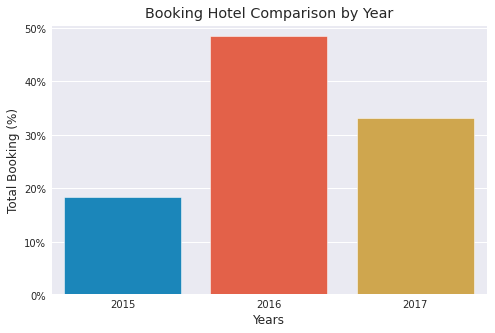

In [17]:
x,y = get_count(df_not_canceled['arrival_date_year'])
plot (x,y, x_label = 'Years', y_label = 'Total Booking (%)', title = 'Booking Hotel Comparison by Year')

"Dalam 3 tahun terakhir, persentase booking mengalami fluktuasi dimana pada tahun 2016 mengalami lonjakan booking sebesar 30% dibandingkan tahun 2015. Namun di tahun 2017 mengalami penurunan booking sekitar 15%"

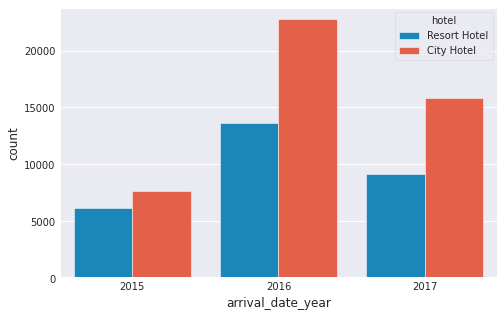

In [18]:
plt.subplots(figsize=(7,5))
sns.countplot (x = 'arrival_date_year', hue = 'hotel', data = df_not_canceled)

"Apabila di break down berdasarkan jenis hotel, baik city hotel dan resort hotel menunjukkan tren yang sama yaitu mengalami peningkatan pada tahun 2016 kemudian menurun kembali pada tahun 2017"

### Kapan bulan paling banyak booking hotel?" ###

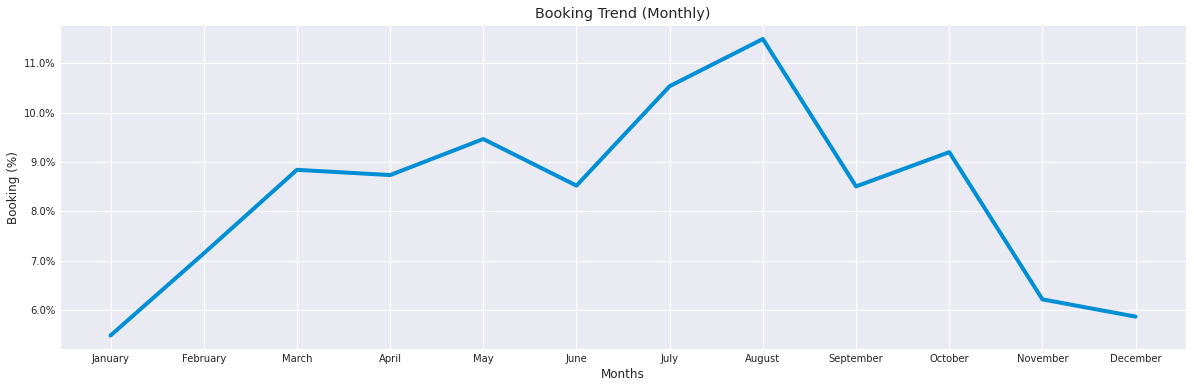

In [19]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

sorted_months = df_not_canceled['arrival_date_month'].value_counts().reindex(new_order)

x = sorted_months.index
y = sorted_months/sorted_months.sum()*100



plot(x, y.values, x_label='Months', y_label='Booking (%)', title='Booking Trend (Monthly)', type='line', figsize=(18,6))

"Dalam 1 tahun, peningkatan booking order yaitu pada bulan januari - maret dan juni - agustus. Penurunan booking terjadi di akhir tahun"

### Jenis akomodasi yang paling sering di booking ###

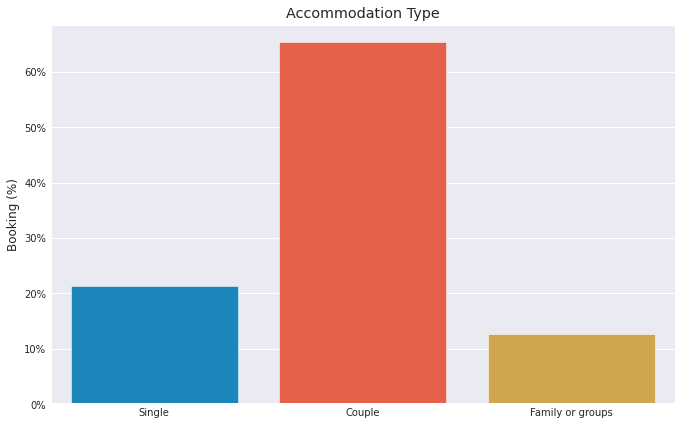

In [20]:
## asumsi penentuan single, couple dan keluarga
single   = df_not_canceled[(df_not_canceled.adults==1) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
couple   = df_not_canceled[(df_not_canceled.adults==2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
family   = df_not_canceled[df_not_canceled.adults + df_not_canceled.children + df_not_canceled.babies > 2]

names = ['Single', 'Couple', 'Family or groups']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/df_not_canceled.shape[0]*100 for x in count]

plot(names,count_percent,  y_label='Booking (%)', title='Accommodation Type', figsize=(10,7))

"lebih dari 60% pengunjung hotel adalah pasangan, sedangkan lebih dari 20% adalah single visitor dan sisanya adalah keluarga atau kelompok lebih dari 2 pengunjung"

## Things that related to those that need improvement ##

### Efektifitas jenis pemasaran berdasarkan jumlah booking ###

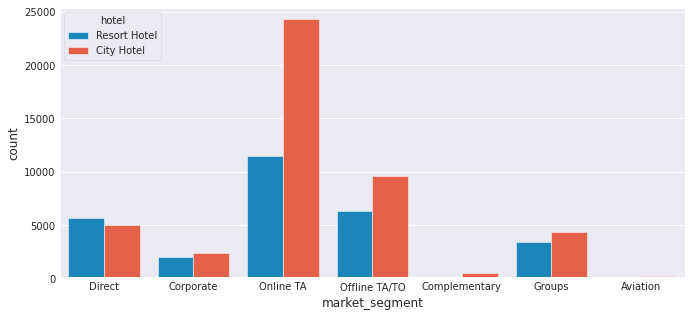

In [21]:
plt.subplots(figsize=(10,5))
sns.countplot (x = 'market_segment', hue = 'hotel', data = df_not_canceled)

"Jumlah booking terbesar terdapat pada pemasaran secara online diikuti dengan pemasaran secara langsung. Sedangkan terendah yaitu pemasaran melalui penerbangan"

In [22]:
df_is_canceled = df[df['is_canceled']!= 0]

### Berapa lama tamu tinggal di hotel ###

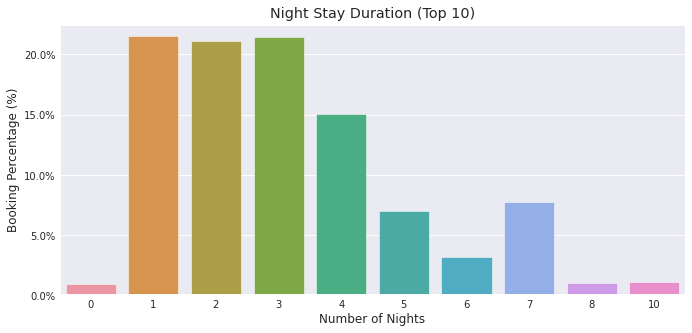

In [23]:
total_nights = df_not_canceled['stays_in_weekend_nights'] + df_not_canceled['stays_in_week_nights']
x,y = get_count(total_nights, limit = 10) #mengambil 10 hasil terbesar dari lama menginap tamu

plot(x,y, x_label='Number of Nights', y_label='Booking Percentage (%)', title='Night Stay Duration (Top 10)', figsize=(10,5))

"Lebih dari 60% pengunjung akan menginap selama 1 - 3 hari, durasi terlama pengunjung menginap yaitu 10 dan 14 hari"

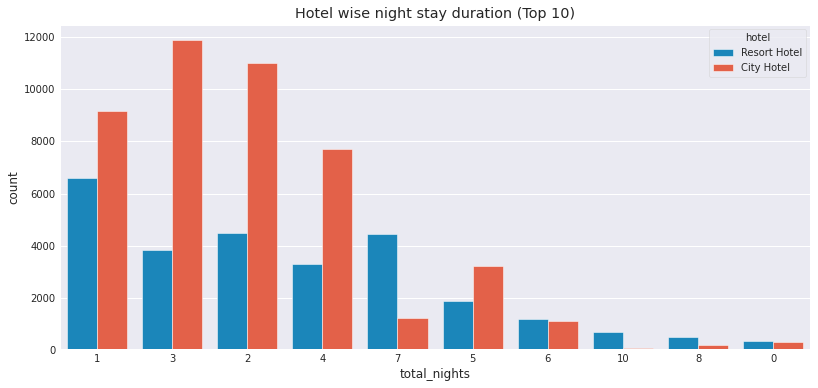

In [24]:
df_not_canceled.loc[:,'total_nights'] = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel wise night stay duration (Top 10)')
sns.countplot(x='total_nights', hue='hotel', data=df_not_canceled,
              order = df_not_canceled.total_nights.value_counts().iloc[:10].index, ax=ax);

"Apabila di breakdown per jenis hotel, untuk city hotel dominan pengunjung akan menginap selama 1 - 3 hari sementara untuk resort hotel dominan pengunjung akan menginap antara 1 - 2 hari dan 7 hari"

### Jumlah Kasus Cancel berdasarkan Market Segmen/Metode Pemasaran ###

AttributeError: ignored

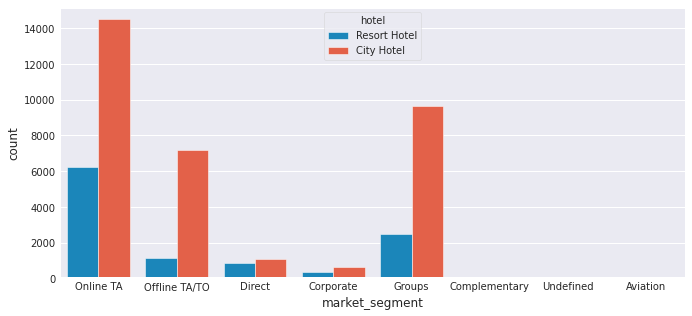

In [25]:
# Data yang digunakan adalah is_canceled dan market_segment
plt.subplots(figsize=(10,5))
sns.countplot (x = 'market_segment', hue = 'hotel', data = df_is_canceled)
plt.x_label("Jenis Pemasaran", fontsize = 12, labelpad = 5)
plt.y_label("Jumlah Booking yang Dibatalkan", fontsize = 12, labelpad = 5)

### Pengaruh Lead Time terhadap status booking ###

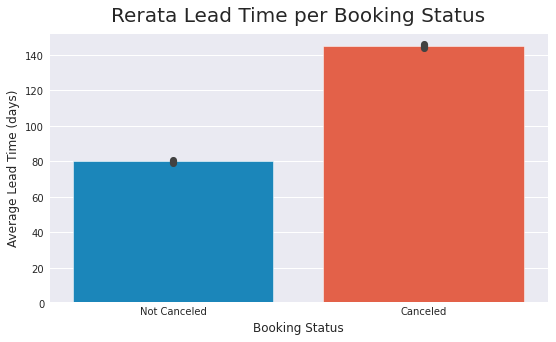

In [26]:
plt.figure(figsize=(8,5)) 
plt.title("Rerata Lead Time per Booking Status", fontsize = 20, pad = 10)
sns.barplot(x=df['is_canceled'], y=df['lead_time'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Lead Time (days)", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

### Korelasi antar bulan dengan jenis kamar yang di booking ###

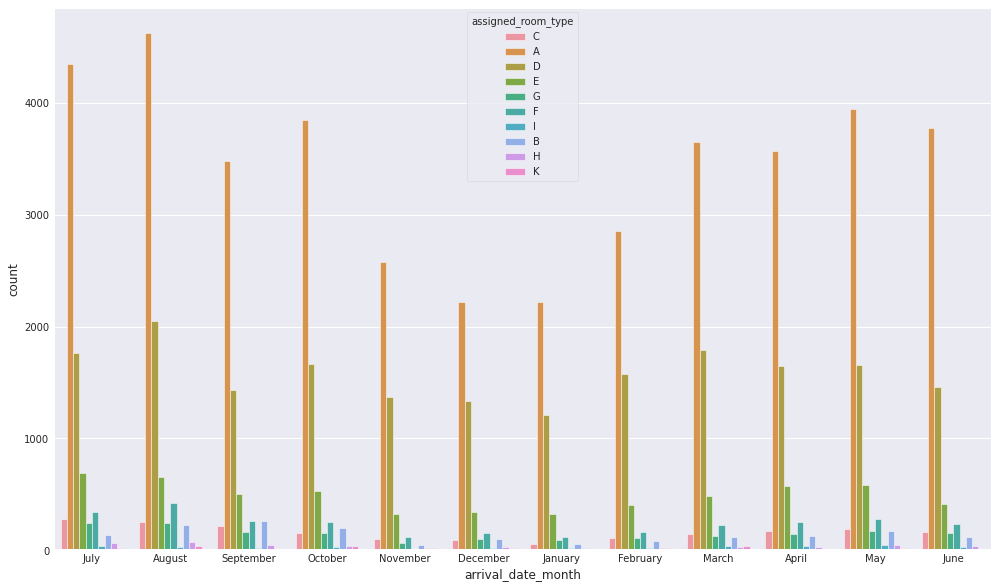

In [27]:
plt.subplots(figsize=(15,10))
sns.countplot (x = 'arrival_date_month', hue = 'assigned_room_type', data = df_not_canceled)

### Korelasi antara luas area parkir dan jumlah kasus cancel ###


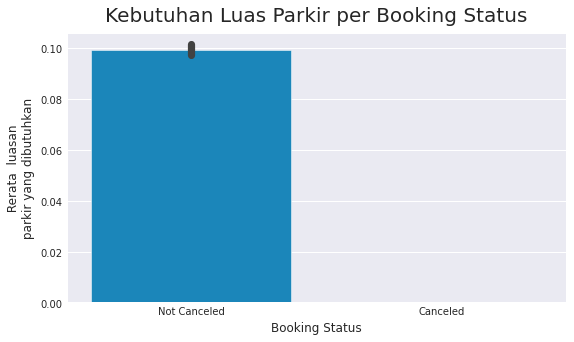

In [28]:
plt.figure(figsize=(8,5)) 
plt.title("Kebutuhan Luas Parkir per Booking Status", fontsize = 20, pad = 10)
sns.barplot(x=df['is_canceled'], y=df['required_car_parking_spaces'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel(" Rerata  luasan \n parkir yang dibutuhkan ", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

# Data Preprocessing

## Missing value

In [ ]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [ ]:
df.fillna({'company':0, 'agent':0}, inplace = True)
df['country'].fillna('Unknown', inplace=True)
df['children'].fillna(0, inplace=True)

In [ ]:
df[(df.adults+df.babies+df.children==0)].shape

(180, 32)

In [ ]:
df = df.drop(df[(df.adults+df.babies+df.children)==0].index)

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

## Duplikasi Data

In [ ]:
df.duplicated(subset=None)

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119210, dtype: bool

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(87230, 32)

# Feature enginer

In [ ]:
df_new = df.copy()

In [ ]:
## Make the new column which contain 1 if guest received the same room which was reserved otherwise 0
df_new['Room'] = 0
df_new.loc[ df_new['reserved_room_type'] == df_new['assigned_room_type'] , 'Room'] = 1


## Make the new column which contain 1 if the guest has cancelled more booking in the past
## than the number of booking he did not cancel, otherwise 0

df_new['net_cancelled'] = 0
df_new.loc[ df_new['previous_cancellations'] > df_new['previous_bookings_not_canceled'] , 'net_cancelled'] = 1

## Correlation among Variables

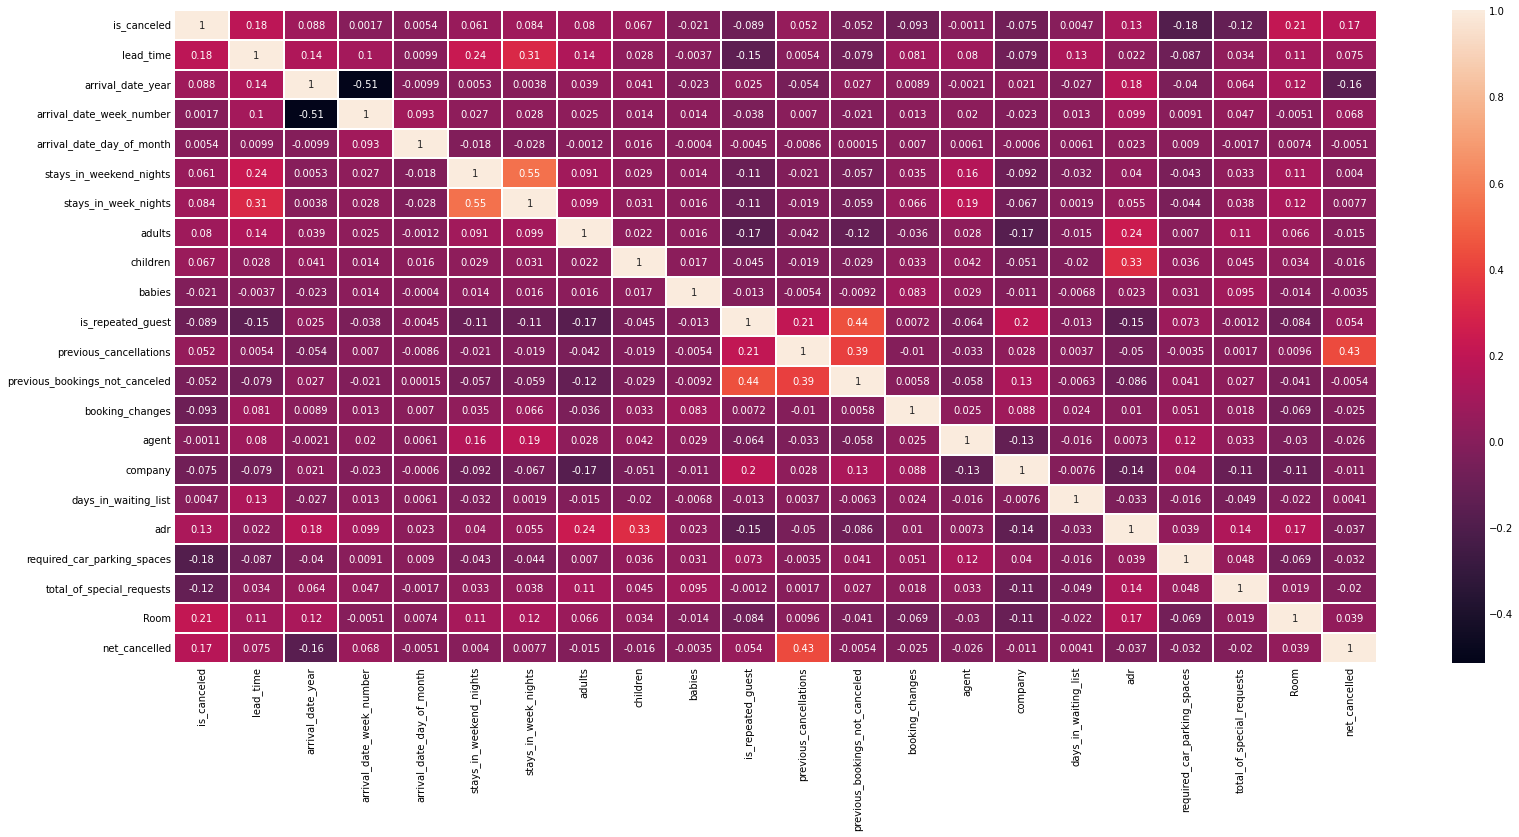

In [ ]:
plt.figure(figsize = (24, 12))

corr = df_new.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [ ]:
correlation = df_new.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
Room                              0.213363
lead_time                         0.184515
required_car_parking_spaces       0.184456
net_cancelled                     0.171717
adr                               0.127233
total_of_special_requests         0.120794
booking_changes                   0.093236
is_repeated_guest                 0.088764
arrival_date_year                 0.088020
stays_in_week_nights              0.084159
adults                            0.080271
company                           0.075314
children                          0.067182
stays_in_weekend_nights           0.060992
previous_bookings_not_canceled    0.052178
previous_cancellations            0.051501
babies                            0.020627
arrival_date_day_of_month         0.005449
days_in_waiting_list              0.004710
arrival_date_week_number          0.001691
agent                             0.001145
Name: is_canceled, dtype: float64

In [ ]:
useless_col = ['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month',
                            'assigned_room_type','reserved_room_type',
                            'previous_cancellations','previous_bookings_not_canceled','days_in_waiting_list']

df_new.drop(useless_col, axis = 1, inplace=True)

In [ ]:
df_new['reservation_status_date'] = pd.to_datetime(df_new['reservation_status_date'])

df_new['year'] = df_new['reservation_status_date'].dt.year
df_new['month'] = df_new['reservation_status_date'].dt.month
df_new['day'] = df_new['reservation_status_date'].dt.day

In [ ]:
df_new.drop(['reservation_status_date','arrival_date_month','reservation_status'] , axis = 1, inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df_new['country'] = labelencoder.fit_transform(df_new['country'])

In [ ]:
print(df_new['year'].unique())

[2015 2014 2016 2017]


In [ ]:
#encoding
df_new['hotel'] = df_new['hotel'].map({'Resort Hotel' : 0,
                                           'City Hotel' : 1})

df_new['meal'] = df_new['meal'].map({'BB' : 0,
                                         'FB': 1,
                                         'HB': 2,
                                         'SC': 3,
                                         'Undefined': 4})

df_new['market_segment'] = df_new['market_segment'].map({'Direct': 0,
                                                             'Corporate': 1,
                                                             'Online TA': 2,
                                                             'Offline TA/TO': 3,
                                                             'Complementary': 4,
                                                             'Groups': 5,
                                                             'Undefined': 6,
                                                             'Aviation': 7})
df_new['distribution_channel'] = df_new['distribution_channel'].map({'Direct': 0,
                                                                         'Corporate': 1,
                                                                         'TA/TO': 2,
                                                                         'Undefined': 3,
                                                                         'GDS': 4})

df_new['deposit_type'] = df_new['deposit_type'].map({'No Deposit': 0,
                                                         'Refundable': 1,
                                                         'Non Refund': 3})

df_new['customer_type'] = df_new['customer_type'].map({'Transient': 0, 
                                                           'Contract': 1,
                                                           'Transient-Party': 2,
                                                           'Group': 3})

df_new['year'] = df_new['year'].map({2015: 0,
                                         2014: 1,
                                         2016: 2,
                                         2017: 3})

In [ ]:
df_new

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,booking_changes,deposit_type,agent,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Room,net_cancelled,year,month,day
0,0,0,342,0,0,2,0.0,0,0,135,0,0,0,3,0,0.0,0.0,0,0.00,0,0,1,0,0,7,1
1,0,0,737,0,0,2,0.0,0,0,135,0,0,0,4,0,0.0,0.0,0,0.00,0,0,1,0,0,7,1
2,0,0,7,0,1,1,0.0,0,0,59,0,0,0,0,0,0.0,0.0,0,75.00,0,0,0,0,0,7,2
3,0,0,13,0,1,1,0.0,0,0,59,1,1,0,0,0,304.0,0.0,0,75.00,0,0,1,0,0,7,2
4,0,0,14,0,2,2,0.0,0,0,59,2,2,0,0,0,240.0,0.0,0,98.00,0,1,1,0,0,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,1,0,23,2,5,2,0.0,0,0,15,3,2,0,0,0,394.0,0.0,0,96.14,0,0,1,0,3,9,6
119386,1,0,102,2,5,3,0.0,0,0,56,2,2,0,0,0,9.0,0.0,0,225.43,0,2,1,0,3,9,7
119387,1,0,34,2,5,2,0.0,0,0,43,2,2,0,0,0,9.0,0.0,0,157.71,0,4,1,0,3,9,7
119388,1,0,109,2,5,2,0.0,0,0,59,2,2,0,0,0,89.0,0.0,0,104.40,0,0,1,0,3,9,7


## Feature Scalling

In [ ]:
# minmax scalling
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(df_new)
df_new = pd.DataFrame(mm.transform(df_new), columns=df_new.columns)

In [ ]:
df_new.var()

hotel                          0.237742
is_canceled                    0.199484
lead_time                      0.013635
stays_in_weekend_nights        0.002924
stays_in_week_nights           0.001664
adults                         0.000128
children                       0.002082
babies                         0.000129
meal                           0.073030
country                        0.064627
market_segment                 0.027559
distribution_channel           0.033583
is_repeated_guest              0.037078
booking_changes                0.001559
deposit_type                   0.011885
agent                          0.042257
company                        0.009874
customer_type                  0.058203
adr                            0.000103
required_car_parking_spaces    0.001240
total_of_special_requests      0.027692
Room                           0.126742
net_cancelled                  0.012373
year                           0.106803
month                          0.086261


## Split Data

In [ ]:
from sklearn.model_selection import train_test_split

X = df_new.drop(columns=['is_canceled']).copy()
y = df_new['is_canceled'].copy()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
print(len(X_train))
print(len(X_test))

65422
21808


In [ ]:
X_train.head()

,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,booking_changes,deposit_type,agent,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Room,net_cancelled,year,month,day
37072,1.0,0.198100,0.000000,0.06,0.036364,0.0,0.0,0.00,0.067797,0.428571,0.50,0.0,0.000000,0.0,0.039252,0.000000,0.666667,0.008116,0.0,0.0,0.0,0.0,0.666667,0.000000,0.000000
41680,1.0,0.168250,0.105263,0.02,0.036364,0.0,0.0,0.00,0.192090,0.285714,0.50,0.0,0.000000,0.0,0.016822,0.000000,0.000000,0.023154,0.0,0.2,1.0,0.0,0.666667,0.545455,0.300000
76598,1.0,0.005427,0.105263,0.00,0.036364,0.0,0.0,0.75,0.288136,0.285714,0.50,0.0,0.000000,0.0,0.016822,0.000000,0.000000,0.019122,0.0,0.2,1.0,0.0,1.000000,0.090909,0.900000
65674,1.0,0.006784,0.000000,0.02,0.018182,0.0,0.0,0.00,0.988701,0.000000,0.00,1.0,0.055556,0.0,0.026168,0.000000,0.000000,0.015053,0.0,0.6,0.0,0.0,1.000000,0.090909,0.300000
72020,1.0,0.001357,0.000000,0.02,0.018182,0.0,0.0,0.00,0.288136,0.142857,0.25,0.0,0.000000,0.0,0.000000,0.666667,0.000000,0.031122,0.0,0.0,1.0,0.0,0.666667,0.909091,0.266667


In [ ]:
X_test.head()

,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,booking_changes,deposit_type,agent,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Room,net_cancelled,year,month,day
52697,1.0,0.280868,0.000000,0.08,0.036364,0.0,0.0,0.75,0.762712,0.285714,0.50,0.0,0.000000,0.0,0.013084,0.000000,0.0,0.019492,0.000,0.0,1.0,0.0,1.000000,0.090909,0.100000
18652,0.0,0.004071,0.052632,0.02,0.036364,0.0,0.0,0.00,0.762712,0.000000,0.00,0.0,0.055556,0.0,0.467290,0.000000,0.0,0.018752,0.000,0.0,1.0,0.0,0.666667,0.272727,0.566667
29343,0.0,0.066486,0.052632,0.04,0.036364,0.0,0.0,0.00,0.762712,0.000000,0.00,1.0,0.000000,0.0,0.467290,0.000000,0.0,0.027445,0.125,0.0,1.0,0.0,1.000000,0.454545,0.233333
15944,0.0,0.004071,0.000000,0.02,0.018182,0.0,0.0,0.00,0.762712,0.142857,0.25,0.0,0.000000,0.0,0.000000,0.086556,0.0,0.006729,0.000,0.0,0.0,0.0,0.666667,0.000000,0.700000
75372,1.0,0.048847,0.052632,0.04,0.036364,0.0,0.0,0.50,0.316384,0.285714,0.50,0.0,0.000000,0.0,0.013084,0.000000,0.0,0.015848,0.000,0.2,1.0,0.0,1.000000,0.000000,0.966667


In [ ]:
y_train.head(), y_test.head()

(37072    0.0
 41680    1.0
 76598    0.0
 65674    0.0
 72020    0.0
 Name: is_canceled, dtype: float64, 52697    1.0
 18652    0.0
 29343    0.0
 15944    0.0
 75372    0.0
 Name: is_canceled, dtype: float64)

## Model Selection

In [ ]:
#Decision Tree Classifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
f1score_dtc = f1_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"F1 Score is : {f1score_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.8285491562729274
F1 Score is : 0.6869295821820314
Confusion Matrix : 
[[13967  1965]
 [ 1774  4102]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88     15932
         1.0       0.68      0.70      0.69      5876

    accuracy                           0.83     21808
   macro avg       0.78      0.79      0.78     21808
weighted avg       0.83      0.83      0.83     21808



In [ ]:
#KNN

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
f1score_knn = f1_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"F1 Score is : {f1score_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.819424064563463
F1 Score is : 0.6464991023339317
Confusion Matrix : 
[[14269  1663]
 [ 2275  3601]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88     15932
         1.0       0.68      0.61      0.65      5876

    accuracy                           0.82     21808
   macro avg       0.77      0.75      0.76     21808
weighted avg       0.81      0.82      0.82     21808



In [ ]:
# Random Forest Classifier

rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
f1score_rd_clf = f1_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"F1 Score is : {f1score_rd_clf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.8880685986793837
Confusion Matrix : 
[[15120   812]
 [ 1629  4247]]
F1 Score is : 0.776771833561957
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93     15932
         1.0       0.84      0.72      0.78      5876

    accuracy                           0.89     21808
   macro avg       0.87      0.84      0.85     21808
weighted avg       0.89      0.89      0.89     21808



In [ ]:
# Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
f1score_lr = f1_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"F1 Score is : {f1score_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.7949376375641967
F1 Score is : 0.5075974454965867
Confusion Matrix : 
[[15031   901]
 [ 3571  2305]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87     15932
         1.0       0.72      0.39      0.51      5876

    accuracy                           0.79     21808
   macro avg       0.76      0.67      0.69     21808
weighted avg       0.78      0.79      0.77     21808



In [ ]:
# SVM

from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel

clf.fit(X_train, y_train)

y_pred_svm = clf.predict(X_test)

In [ ]:
acc_svm = accuracy_score(y_test, y_pred_svm)
f1score_svm = f1_score(y_test, y_pred_svm)
conf = confusion_matrix(y_test, y_pred_svm)
clf_report = classification_report(y_test, y_pred_svm)

print(f"Accuracy Score of SVM is : {acc_svm}")
print(f"F1 Score is : {f1score_svm}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of SVM is : 0.7895267791636097
F1 Score is : 0.4088098918083462
Confusion Matrix : 
[[15631   301]
 [ 4289  1587]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.78      0.98      0.87     15932
         1.0       0.84      0.27      0.41      5876

    accuracy                           0.79     21808
   macro avg       0.81      0.63      0.64     21808
weighted avg       0.80      0.79      0.75     21808



# Modelling

In [ ]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','SVM'],
    'Score' : [f1score_lr, f1score_knn, f1score_dtc, f1score_rd_clf, f1score_svm]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest Classifier,0.776772
2,Decision Tree Classifier,0.686930
1,KNN,0.646499
0,Logistic Regression,0.507597
4,SVM,0.408810


## Handling Imbalanced Data

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

0.0    47289
1.0    18133
Name: is_canceled, dtype: int64

In [ ]:
y_smote.value_counts()

0.0    47289
1.0    47289
Name: is_canceled, dtype: int64

In [ ]:
rd_smote = RandomForestClassifier ()
rd_smote.fit(X_smote, y_smote)

y_pred_rd_clf_smote = rd_smote.predict(X_test)

acc_rd_clf_smote = accuracy_score(y_test, y_pred_rd_clf_smote)
conf = confusion_matrix(y_test, y_pred_rd_clf_smote)
clf_report = classification_report(y_test, y_pred_rd_clf_smote)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf_smote}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.880548422597212
Confusion Matrix : 
[[14814  1118]
 [ 1487  4389]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92     15932
         1.0       0.80      0.75      0.77      5876

    accuracy                           0.88     21808
   macro avg       0.85      0.84      0.85     21808
weighted avg       0.88      0.88      0.88     21808



## Hyperparameter tuning 

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10,1000,10)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 5, 10, 14] # minimum sample number to split a node
min_samples_leaf = [1, 2, 4, 6, 8] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
        
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'bootstrap': [True, False]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rfc=RandomForestClassifier()
rfc_randomcv=RandomizedSearchCV(estimator = rfc,param_distributions = random_grid,
                                cv = 3, verbose=2, random_state=100, n_jobs = 4)
rfc_randomcv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [ ]:
rfc_randomcv.best_params_

{'bootstrap': False,
 'max_depth': 450,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
best_random_grid= rfc_randomcv.best_estimator_

y_pred = best_random_grid.predict(X_test)
f1score_rf = f1_score(y_test, y_pred)

print(confusion_matrix(y_test,y_pred))
print(f"F1 Score is : {f1score_rf}")
print(classification_report(y_test,y_pred))

[[15115   817]
 [ 1557  4319]]
F1 Score is : 0.7844169996367598
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93     15932
         1.0       0.84      0.74      0.78      5876

    accuracy                           0.89     21808
   macro avg       0.87      0.84      0.86     21808
weighted avg       0.89      0.89      0.89     21808



## Feature Importance

<BarContainer object of 25 artists>

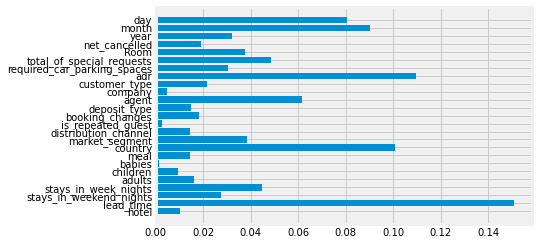

In [ ]:
fi = rd_clf.feature_importances_
col = X_train.columns
plt.barh(col,fi)